In [1]:
%%time

# Installing select libraries:-
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Set the plot style to 'fivethirtyeight'
plt.style.use("fivethirtyeight")

from datetime import datetime  # Importing the datetime class from the datetime module

from scipy import stats # statistical functions

filterwarnings('ignore'); # Ignore warning messages
from IPython.display import display_html, clear_output; # displaying HTML content


clear_output();
print();
collect();


CPU times: user 910 ms, sys: 463 ms, total: 1.37 s
Wall time: 2.03 s


In [2]:
data = pd.read_excel('/kaggle/input/college-student-ai-use-in-school/AI On-Campus Research Survey (Responses).xlsx')
data.head()

,Timestamp,"On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?","On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?",Do you know what Chat-GPT is?,What college are you in?
0,2023-03-31 19:59:11.443,5,5,5,5,Yes,"Science, Engineering, & Technology"
1,2023-03-31 19:59:44.970,4,3,4,4,Yes,"Science, Engineering, & Technology"
2,2023-03-31 20:06:24.653,3,3,5,1,No,Business
3,2023-03-31 20:10:54.939,4,3,5,2,Yes,Business
4,2023-03-31 20:14:34.488,5,2,1,5,Yes,Humanities & Social Sciences


In [3]:
# Assuming df is your DataFrame containing the survey data
new_column_names = {
    'Timestamp': 'response_timestamp',
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'ai_knowledge_rating',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'ai_personal_use_frequency',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'ai_school_use_frequency',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'interest_in_ai_career',
    'Do you know what Chat-GPT is?': 'awareness_of_chat-gpt',
    'What college are you in?': 'college'
}

# Rename columns to lowercase
data = data.rename(columns=new_column_names)

# Now your DataFrame 'df' has the columns renamed to lowercase

In [4]:
data.head()

,response_timestamp,ai_knowledge_rating,ai_personal_use_frequency,ai_school_use_frequency,interest_in_ai_career,awareness_of_chat-gpt,college
0,2023-03-31 19:59:11.443,5,5,5,5,Yes,"Science, Engineering, & Technology"
1,2023-03-31 19:59:44.970,4,3,4,4,Yes,"Science, Engineering, & Technology"
2,2023-03-31 20:06:24.653,3,3,5,1,No,Business
3,2023-03-31 20:10:54.939,4,3,5,2,Yes,Business
4,2023-03-31 20:14:34.488,5,2,1,5,Yes,Humanities & Social Sciences


In [5]:
data['college'].value_counts()

college
Science, Engineering, & Technology    103
Business                               65
Humanities & Social Sciences           39
Nursing & Health Care                  16
Education                              13
Arts & Media                           12
Theology                                7
Business and education                  1
Can you email Robert.loy@gcu.edu        1
CreamAToligy                            1
Name: count, dtype: int64

In [6]:
# Filter out counts with values in the range 0-1
filtered_colleges = data['college'].value_counts()[data['college'].value_counts() > 1].index

# Update the dataset to keep only the rows with colleges from filtered_colleges
data = data[data['college'].isin(filtered_colleges)]

In [7]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Do you know what Chat-GPT is?' column
data['awareness_of_chat-gpt'] = data['awareness_of_chat-gpt'].replace(['Yes', 'No'], [1, 0])

# Now your DataFrame 'data' has boolean values replaced with 1s and 0s
data.head()                                     

,response_timestamp,ai_knowledge_rating,ai_personal_use_frequency,ai_school_use_frequency,interest_in_ai_career,awareness_of_chat-gpt,college
0,2023-03-31 19:59:11.443,5,5,5,5,1,"Science, Engineering, & Technology"
1,2023-03-31 19:59:44.970,4,3,4,4,1,"Science, Engineering, & Technology"
2,2023-03-31 20:06:24.653,3,3,5,1,0,Business
3,2023-03-31 20:10:54.939,4,3,5,2,1,Business
4,2023-03-31 20:14:34.488,5,2,1,5,1,Humanities & Social Sciences


In [8]:
# Checking the null values in the dataset
data.isna().sum()

response_timestamp           0
ai_knowledge_rating          0
ai_personal_use_frequency    0
ai_school_use_frequency      0
interest_in_ai_career        0
awareness_of_chat-gpt        0
college                      0
dtype: int64

In [9]:
# Checking the duplicate values in the data
duplicate_values=data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


In [10]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 0 to 257
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   response_timestamp         255 non-null    datetime64[ns]
 1   ai_knowledge_rating        255 non-null    int64         
 2   ai_personal_use_frequency  255 non-null    int64         
 3   ai_school_use_frequency    255 non-null    int64         
 4   interest_in_ai_career      255 non-null    int64         
 5   awareness_of_chat-gpt      255 non-null    int64         
 6   college                    255 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 15.9+ KB


In [11]:
# Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

The dataset contains 255 rows and 7 columns


In [12]:
# Attempt to convert 'date' column to datetime format
try:
    data['response_timestamp'] = pd.to_datetime(data['response_timestamp'], format='mixed')
    print("All values in 'date' column are valid dates.")
except ValueError as e:
    print("Error:", e)
    print("There are non-date values present in the 'date' column.")

All values in 'date' column are valid dates.


In [13]:
# Function to map dates to seasons
def date_to_season(response_timestamp):
    # Extract month from date string and convert it to integer
    month = datetime.strptime(response_timestamp, "%Y-%m-%d").month
    
    # Map months to seasons
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"
    
# Apply date_to_season function to create a new column
data["season"] = data["response_timestamp"].apply(lambda x: date_to_season(x.strftime("%Y-%m-%d")))

In [14]:
# Extract year from the 'date' column
data['year'] = data['response_timestamp'].dt.year

# Extract month from the 'date' column
data['month'] = data['response_timestamp'].dt.month

# Extract month name from the 'date' column
data['month_name'] = data['response_timestamp'].dt.month_name()

# Extract day from the 'date' column
data['day'] = data['response_timestamp'].dt.day

data.tail()

,response_timestamp,ai_knowledge_rating,ai_personal_use_frequency,ai_school_use_frequency,interest_in_ai_career,awareness_of_chat-gpt,college,season,year,month,month_name,day
253,2023-10-24 14:02:43.753,5,2,3,3,1,"Science, Engineering, & Technology",Autumn,2023,10,October,24
254,2023-10-24 14:22:30.477,4,3,2,2,1,Arts & Media,Autumn,2023,10,October,24
255,2023-10-25 10:08:07.129,4,3,3,2,1,"Science, Engineering, & Technology",Autumn,2023,10,October,25
256,2023-11-06 08:52:20.994,4,3,2,2,1,"Science, Engineering, & Technology",Autumn,2023,11,November,6
257,2024-01-25 14:51:10.920,4,2,2,2,1,"Science, Engineering, & Technology",Winter,2024,1,January,25


In [15]:
# Remove the "response_timestamp" column
data = data.drop(columns=['response_timestamp'])

In [16]:
data.tail()

,ai_knowledge_rating,ai_personal_use_frequency,ai_school_use_frequency,interest_in_ai_career,awareness_of_chat-gpt,college,season,year,month,month_name,day
253,5,2,3,3,1,"Science, Engineering, & Technology",Autumn,2023,10,October,24
254,4,3,2,2,1,Arts & Media,Autumn,2023,10,October,24
255,4,3,3,2,1,"Science, Engineering, & Technology",Autumn,2023,10,October,25
256,4,3,2,2,1,"Science, Engineering, & Technology",Autumn,2023,11,November,6
257,4,2,2,2,1,"Science, Engineering, & Technology",Winter,2024,1,January,25


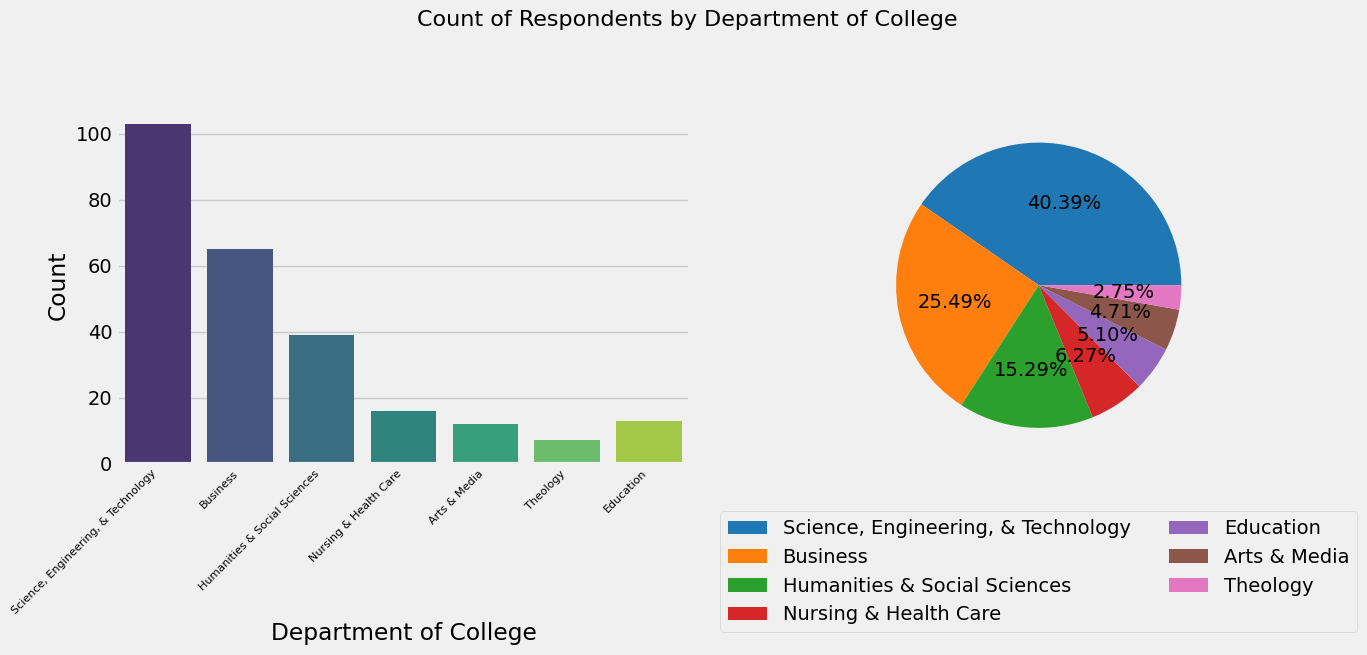

In [17]:
# Calculate the value counts for the 'college' column
college_counts = data['college'].value_counts()

# Generate a custom color palette with enough unique colors for seven categories
custom_palette = sns.color_palette('tab10', n_colors=7)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.countplot(data=data, x='college', palette='viridis', ax=ax[0])

# Set the labels and title
ax[0].set_xlabel('Department of College')
ax[0].set_ylabel('Count')
# plt.title('Count of Respondents by Department of College', pad=60)

# Rotate x-axis labels for better readability
ax[0].tick_params(axis='x', rotation=45, labelsize=8)  # Corrected method for rotating x-axis labels
# Align x-axis tick labels to the right
ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right')


# Pie chart for the distribution of years
# ax[1].pie(college_counts, labels=college_counts.index, autopct='%1.2f%%', rotatelabels=True, textprops={'fontsize': 10})

# Plotting the pie chart with legend and font size
pie = ax[1].pie(college_counts, autopct='%1.2f%%', colors=custom_palette)  # Generate the pie chart without labels

# Create a legend for the pie chart at the bottom
ax[1].legend(pie[0], college_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)  # Use the generated pie chart slices and index labels to create the legend


# Set a single title for the entire figure
plt.suptitle('Count of Respondents by Department of College', fontsize=16, y=1.05)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
data['season'].value_counts()

season
Spring    242
Autumn     12
Winter      1
Name: count, dtype: int64

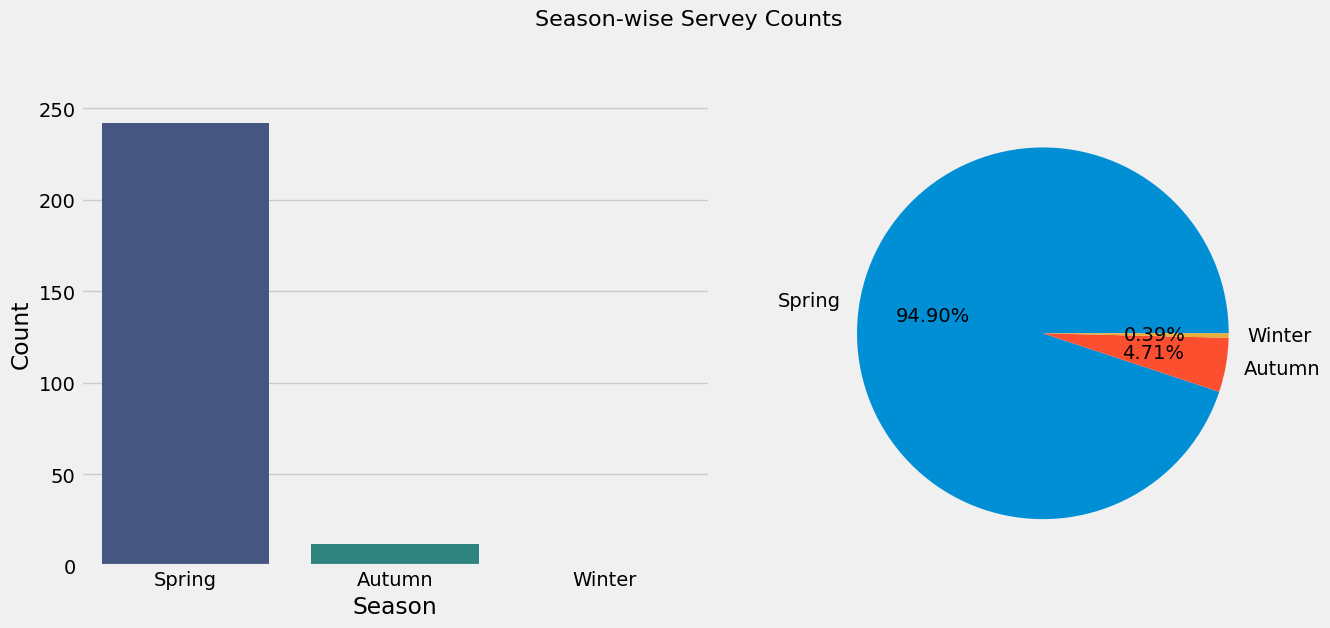

In [19]:
# Get the value counts of the 'season' column
season_counts = data['season'].value_counts()

# Plotting the season-wise value counts
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data, x='season', palette='viridis', ax=ax[0])

# Set labels and title
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(season_counts, labels=season_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Season-wise Servey Counts', fontsize=16, y=1.05)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

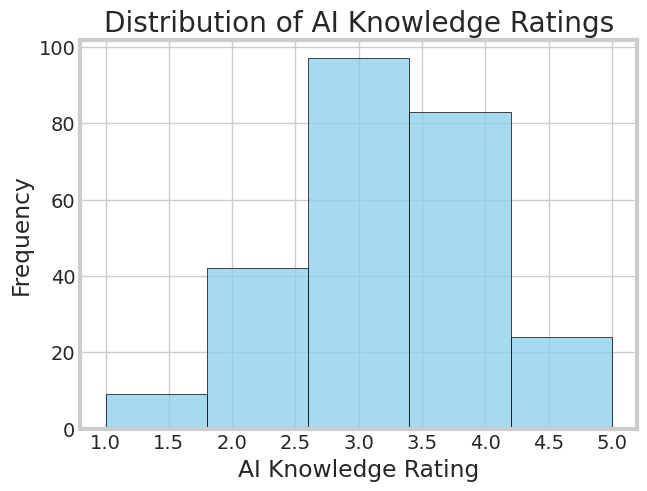

In [20]:
# Set the style
sns.set_style('whitegrid')

# Create the histogram using Seaborn
sns.histplot(data=data, x='ai_knowledge_rating', bins=5, color='skyblue', edgecolor='black')

# Set title and labels
plt.title('Distribution of AI Knowledge Ratings')
plt.xlabel('AI Knowledge Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

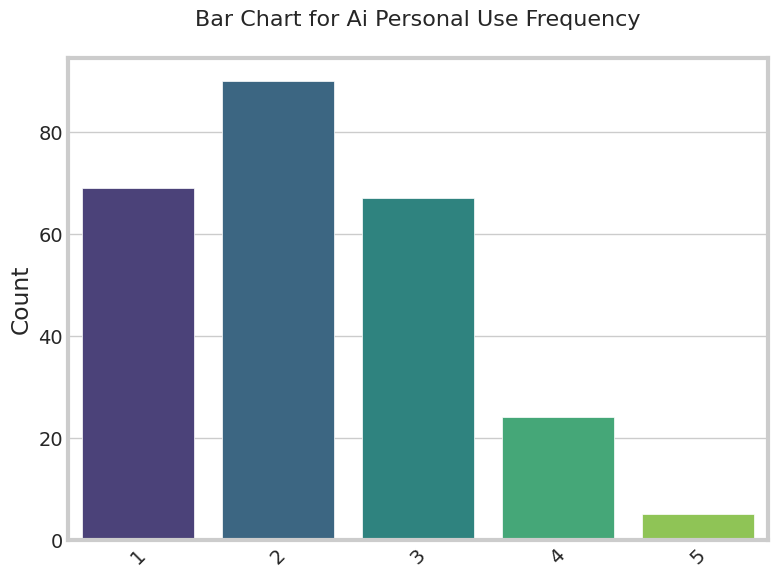

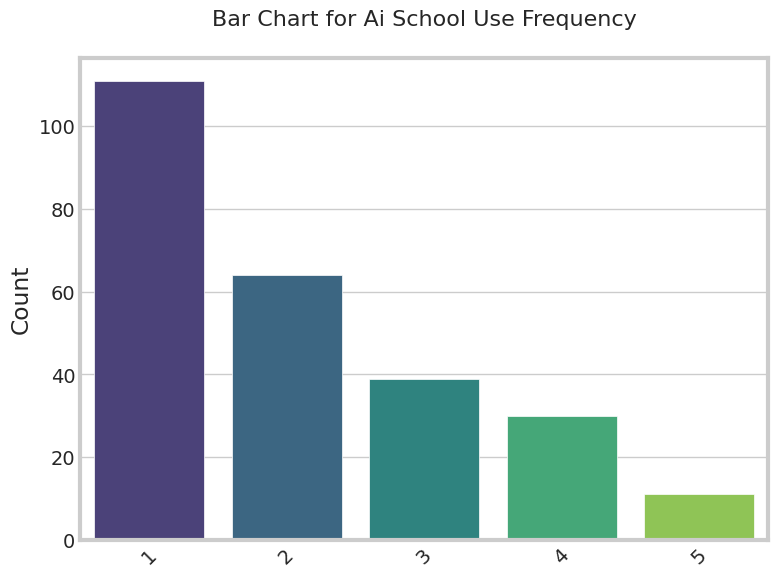

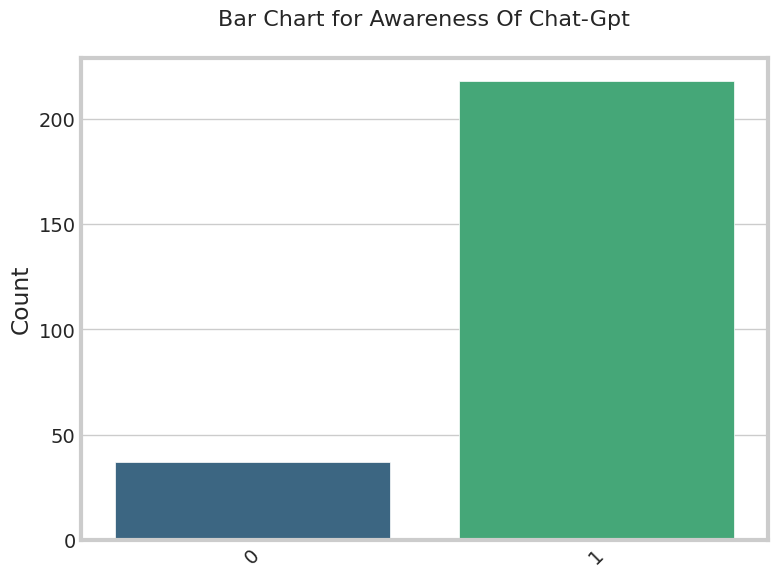

In [21]:
# Define the columns for which you want to create bar charts
columns = ['ai_personal_use_frequency', 'ai_school_use_frequency', 'awareness_of_chat-gpt']

# Loop over the columns and create bar charts
for column in columns:
    
    column_title = column.replace('_', ' ').title()
    # Plotting the bar chart
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, palette='viridis')

    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(f'Bar Chart for {column_title}', fontsize=16, y=1.05)

    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()
